In [1]:
##############################################################################################################
##############################################################################################################
# Final Project - Spam Email Data Classification

##############################################################################################################
# step 1

############ import packages
import os
import sys
import random
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np

In [2]:
############ check os packge and its functions

# os.getcwd return current working directory
print(os.getcwd())

# os.chdir(path) change current working directory to the path
os.chdir(r"C:\Users\Henry\Desktop\ischool\ist_664\EmailSpamCorpora\corpus")


# check result
print(os.getcwd())

# check list.dir function
# provide all file under the directory and in the spam folder
# print(os.listdir("./spam"))

# testing open function
z = open('./spam/' + "0006.2003-12-18.GP.spam.txt", 'r', encoding = 'latin-1')
z.read()

C:\Users\Henry\Downloads
C:\Users\Henry\Desktop\ischool\ist_664\EmailSpamCorpora\corpus


'Subject: dobmeos with hgh my energy level has gone up ! stukm\nintroducing\ndoctor - formulated\nhgh\nhuman growth hormone - also called hgh\nis referred to in medical science as the master hormone . it is very plentiful\nwhen we are young , but near the age of twenty - one our bodies begin to produce\nless of it . by the time we are forty nearly everyone is deficient in hgh ,\nand at eighty our production has normally diminished at least 90 - 95 % .\nadvantages of hgh :\n- increased muscle strength\n- loss in body fat\n- increased bone density\n- lower blood pressure\n- quickens wound healing\n- reduces cellulite\n- improved vision\n- wrinkle disappearance\n- increased skin thickness texture\n- increased energy levels\n- improved sleep and emotional stability\n- improved memory and mental alertness\n- increased sexual potency\n- resistance to common illness\n- strengthened heart muscle\n- controlled cholesterol\n- controlled mood swings\n- new hair growth and color restore\nread\nmor

In [3]:
############ define function to read Spam and normal emails

# remove the input "limit" as it is not necessary
hamtexts = []
spamtexts = []
email_doc_word = []
email_doc_sent = []
email_doc_df = []

def processspamham(path):
    for file in os.listdir("./spam"):
        if file.endswith(".txt"):
            # read each spam txt file and add it to spamtexts list
            f = open("./spam/" + file, 'r', encoding = 'latin-1')
            spamtexts.append(f.read())
            # good practice to close the file after reading it
            f.close()
    for file in os.listdir("./ham"):
        if file.endswith(".txt"):
            # read each text ham file and add it to hamtexts list
            f = open("./ham/" + file, 'r', encoding = 'latin-1')
            hamtexts.append(f.read())
            f.close()
    
    print("Number of spam files: ", len(spamtexts))
    print("Number of ham files: ", len(hamtexts))
    
    # create word tokens
    for spam in spamtexts:
        tokens = nltk.word_tokenize(spam)
        email_doc_word.append((tokens, 'spam'))
    for ham in hamtexts:
        tokens = nltk.word_tokenize(ham)
        email_doc_word.append((tokens, 'ham'))
    
    # create sentence tokens
    for spam in spamtexts:
        tokens = nltk.sent_tokenize(spam)
        email_doc_sent.append((tokens, 'spam'))
    for ham in hamtexts:
        tokens = nltk.sent_tokenize(ham)
        email_doc_sent.append((tokens, 'ham'))
        
    # create a list of raw data
    for spam in spamtexts:
        email_doc_df.append((spam, 'spam'))
    for ham in hamtexts:
        email_doc_df.append((ham, 'ham'))
    

In [4]:
# run the processspamham function

processspamham(os.getcwd())

Number of spam files:  1500
Number of ham files:  3672


In [5]:
# testing the output from the processspamham function 
#print(email_doc_sent[:1])
print(email_doc_word[:1])

# [53] spam email has URL and was tokenized 

[(['Subject', ':', 'dobmeos', 'with', 'hgh', 'my', 'energy', 'level', 'has', 'gone', 'up', '!', 'stukm', 'introducing', 'doctor', '-', 'formulated', 'hgh', 'human', 'growth', 'hormone', '-', 'also', 'called', 'hgh', 'is', 'referred', 'to', 'in', 'medical', 'science', 'as', 'the', 'master', 'hormone', '.', 'it', 'is', 'very', 'plentiful', 'when', 'we', 'are', 'young', ',', 'but', 'near', 'the', 'age', 'of', 'twenty', '-', 'one', 'our', 'bodies', 'begin', 'to', 'produce', 'less', 'of', 'it', '.', 'by', 'the', 'time', 'we', 'are', 'forty', 'nearly', 'everyone', 'is', 'deficient', 'in', 'hgh', ',', 'and', 'at', 'eighty', 'our', 'production', 'has', 'normally', 'diminished', 'at', 'least', '90', '-', '95', '%', '.', 'advantages', 'of', 'hgh', ':', '-', 'increased', 'muscle', 'strength', '-', 'loss', 'in', 'body', 'fat', '-', 'increased', 'bone', 'density', '-', 'lower', 'blood', 'pressure', '-', 'quickens', 'wound', 'healing', '-', 'reduces', 'cellulite', '-', 'improved', 'vision', '-', 'wr

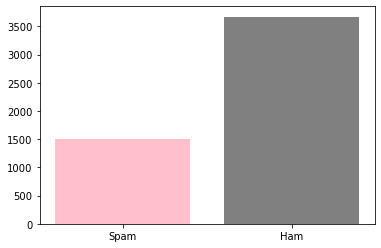

In [6]:
############# Data exploration
import matplotlib.pyplot as plt
import seaborn as sns

# bar chart to show how many examples in each category
plt.bar('Spam', len(os.listdir('./spam')), color = 'pink')
plt.bar('Ham', len(os.listdir('./ham')), color = 'grey')
plt.show()

In [7]:
# explore the lenght of each email in the dataset
df_very_raw = pd.DataFrame(email_doc_df, columns=["text","label"])

df_very_raw['length'] = df_very_raw['text'].str.len()
df_very_raw['length'].describe()

count     5172.000000
mean      1030.231439
std       1505.268730
min         10.000000
25%        238.000000
50%        529.000000
75%       1214.250000
max      31860.000000
Name: length, dtype: float64

In [41]:
print(np.percentile(df_very_raw['length'], 95))

3550.5999999999985


In [46]:
df_very_raw_05_95['length'].describe()

count    4654.000000
mean      809.142673
std       753.734692
min        86.000000
25%       264.250000
50%       529.000000
75%      1111.750000
max      3547.000000
Name: length, dtype: float64

C:\Users\Henry\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Henry\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'email length distribution 5 to 95 percentile')

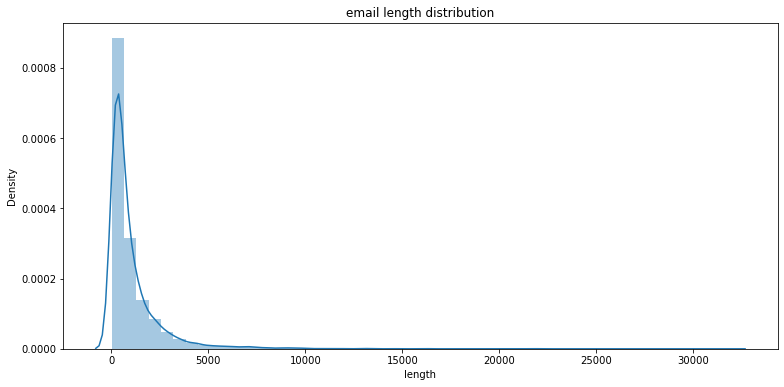

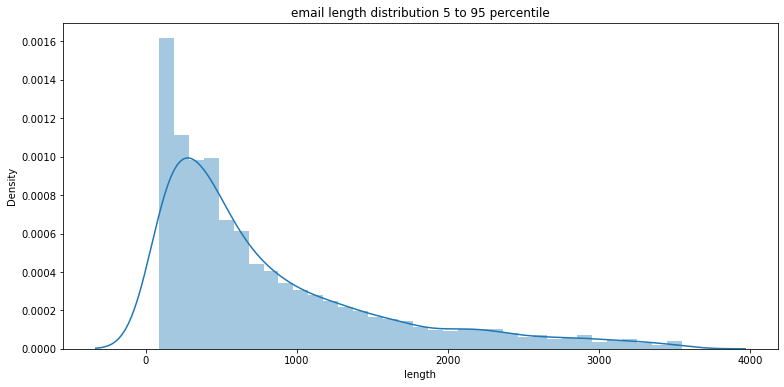

In [8]:
# email length distribution histogram

# all emails included
plt.figure(figsize=(12.8,6))
sns.distplot(df_very_raw['length']).set_title('email length distribution')

# set up 95% percentile& 5% percentile and remove extreme value to check distribution
quantile_95 = df_very_raw['length'].quantile(0.95)
quantile_05 = df_very_raw['length'].quantile(0.05)
df_very_raw_95 = df_very_raw[df_very_raw['length'] < quantile_95]
df_very_raw_05_95 = df_very_raw_95[df_very_raw_95['length']>quantile_05]

# only the middle 90% of the data 
plt.figure(figsize=(12.8,6))
sns.distplot(df_very_raw_05_95['length']).set_title('email length distribution 5 to 95 percentile')

<AxesSubplot:xlabel='label', ylabel='length'>

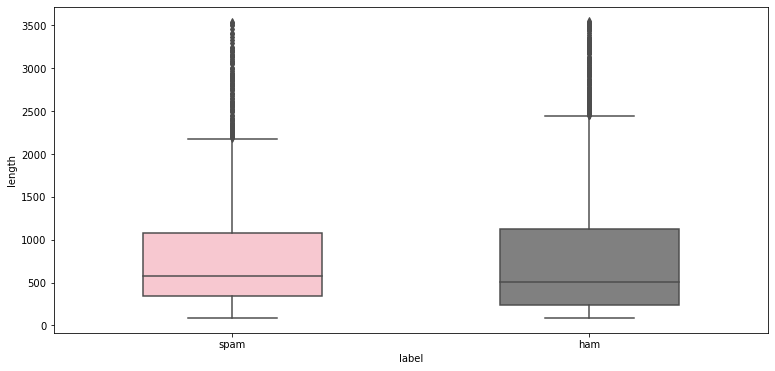

In [9]:
# Whisker plot to compare the length of spam and hame email in terms of length
plt.figure(figsize=(12.8,6))

# set up color to match the bar chart
boxcolor = {"spam": "pink", "ham":"grey"}

sns.boxplot(data=df_very_raw_05_95, x='label', y='length', width=.5, palette = boxcolor)

In [10]:
############ Pre-processing data
##### 1. lower casing
##### 2. remove non-alphabetical 
##### 3. remove stop words
##### 4. Stemming
##### 5. Lemmatization

In [11]:
##### 1. lower casing all words
##### 2. remove non-alphabetical words

# lowercase all words in email_doc_word
email_doc_word_lower = []

# define the regexp pattern
import re
# ^[^a-z]+$ defines a word consists of all non-alphabetical words
# e.g., @5#$2% wil be removed
# but b3d wont be removed
pattern = re.compile('^[^a-z]+$')

for i in range(len(email_doc_word)):
    word_list = []
    word_list_lower = []
    # item includes the list of words and the result (i.e., spam/ham)
    item = ()
    word_list = email_doc_word[i][0]
    
    for word in word_list:
        # if a word does not match the pattern, turn word into lowercase, and add to word lower list
        if not (pattern.match(word)):
            word_list_lower.append(word.lower())
    
    # replace original list of words with list of the same words with all lowercase
    item = (word_list_lower, email_doc_word[i][1])
    email_doc_word_lower.append(item)

# test to see if the lowercase for email_doc_word works
#print(email_doc_word_lower[:1])    


In [12]:
###### 3. remove stop words
# nltk stopwords
nltkstopwords = nltk.corpus.stopwords.words('english')
# more stopwords based on top 50 freq words
morestopwords = ['subject']

# all stopwords used 
stopwords = nltkstopwords + morestopwords
#print(stopwords)

In [13]:
# remove all stop words from email_doc_word file
email_doc_word_lower_stopped_freqcheck = []
email_doc_word_lower_stopped = []
for i in range(len(email_doc_word_lower)):
    word_list = []
    word_list_lower_stopped = []
    
    # item includes the list of words and the result (i.e., spam/ham)
    item = ()
    
    word_list = email_doc_word_lower[i][0]
    for word in word_list:
        if not (word in stopwords):
            email_doc_word_lower_stopped_freqcheck.append(word)
            word_list_lower_stopped.append(word)
    
    item = (word_list_lower_stopped, email_doc_word_lower[i][1])
    email_doc_word_lower_stopped.append(item)


# testing how the stopwords covers all stop words we want to remove
# if we see some words we need to remove, go back and update the stopwords list
email_doc_words_freq = nltk.FreqDist(email_doc_word_lower_stopped_freqcheck)
email_doc_words_freq_top50 = email_doc_words_freq.most_common(50)
for item in email_doc_words_freq_top50:
    print(item)

('ect', 13900)
('hou', 7289)
('enron', 6555)
('com', 3710)
('please', 3200)
('gas', 3034)
('deal', 2827)
('meter', 2459)
('cc', 2371)
('pm', 2343)
('hpl', 2318)
('e', 1976)
('daren', 1901)
('thanks', 1898)
('corp', 1776)
('know', 1588)
('need', 1480)
('new', 1437)
('may', 1383)
('mmbtu', 1349)
('j', 1336)
('forwarded', 1297)
('get', 1276)
('http', 1235)
('price', 1206)
('see', 1200)
('company', 1198)
('let', 1160)
('information', 1154)
('farmer', 1141)
('l', 1108)
('attached', 1097)
('would', 1078)
('xls', 1020)
('us', 1018)
('day', 1007)
('time', 994)
('message', 966)
('one', 935)
('contract', 920)
('th', 906)
('volume', 900)
('mail', 892)
('robert', 886)
('month', 878)
('sitara', 861)
('p', 848)
('email', 833)
('nom', 832)
('texas', 827)


In [14]:
##### 4. stemming
# define the stemmer 
# use porter stemmer but have other options like LanchesterStemmer() or SnowballStemmer()
porter = nltk.PorterStemmer()

# all_word_list is to generate most freq word list to create bag of words feature
all_word_list = []
email_doc_word_lower_stopped_stemmed = []
for i in range(len(email_doc_word_lower_stopped)):
    word_list = []
    word_list_lower_stopped_stemmed = []
    
    # item includes the list of words and the result (i.e., spam/ham)
    item = ()
    
    word_list = email_doc_word_lower_stopped[i][0]
    for word in word_list:
        word_list_lower_stopped_stemmed.append(porter.stem(word))
        # add all stemmed words from all emails to all_word_list  
        all_word_list.append(porter.stem(word))
    
    item = (word_list_lower_stopped_stemmed, email_doc_word_lower_stopped[i][1])
    email_doc_word_lower_stopped_stemmed.append(item)

# test the result
#email_doc_word_lower_stopped_stemmed[0][0]

In [15]:
##### 5. Lemmatization
# this is the alternate step of 4. stemming
# tested and lemmatization outperforms stemming

# define the lemmatizer
lemmatizer = nltk.WordNetLemmatizer()

# all_word_list is to generate most freq word list to create bag of words feature
all_word_list_1 = []
email_doc_word_lower_stopped_lemmatized = []
for i in range(len(email_doc_word_lower_stopped)):
    word_list = []
    word_list_lower_stopped_lemmatized = []
    
    # item includes the list of words and the result (i.e., spam/ham)
    item = ()
    
    word_list = email_doc_word_lower_stopped[i][0]
    for word in word_list:
        word_list_lower_stopped_lemmatized.append(lemmatizer.lemmatize(word))
        # add all stemmed words from all emails to all_word_list  
        all_word_list_1.append(lemmatizer.lemmatize(word))
    
    item = (word_list_lower_stopped_lemmatized, email_doc_word_lower_stopped[i][1])
    email_doc_word_lower_stopped_lemmatized.append(item)


In [16]:
##############################################################################################################
# step 2 create features and use NaiveBayes
##### bag of word features
# bag of word feature for all words before stemming/lemmatization
# bag of word feature for all words after stemming
# bag of word feature for all words after lemmatization

# all words from pre-processing step 3 (meaning they are before stemming/lemmatization)
all_word_list_freq_raw = nltk.FreqDist(word_list_lower_stopped)
all_word_list_freq_raw_top2000 = all_word_list_freq_raw.most_common(2000)

# all_word_list from pre-processing step 4 stemming
all_word_list_freq_stem = nltk.FreqDist(all_word_list)
all_word_list_freq_stem_top2000 = all_word_list_freq_stem.most_common(2000)
#for item in all_word_list_freq_top2000[:50]:
#    print(item)

# all_word_list_1 from pre-processing step 5 lemmatization
all_word_list_freq_lemma = nltk.FreqDist(all_word_list_1)
all_word_list_freq_lemma_top2000 = all_word_list_freq_lemma.most_common(2000)


In [17]:
# create function

# to check if a word before stemming/lemmatization is in the top 2000 freq word list
top2000_word_raw = [word for (word, freq) in all_word_list_freq_raw_top2000]

# to check if a stemmed word is in the top 2000 freq stemmed word list
top2000_word_stem = [word for (word, freq) in all_word_list_freq_stem_top2000]

# to check if a lemmatized word is in the top 2000 freq lemmatized word list
top2000_word_lemma = [word for (word, freq) in all_word_list_freq_lemma_top2000]


# function to check if each word in a email is in the top 2000 freq word list
def bag_of_word(document, word_feature):
    document_word = set(document)
    feature = {}
    for word in word_feature:
        feature['V_{}'.format(word)] = (word in document_word)
    return feature
    

In [18]:
# create featureset for 
# 1. all words before stemming/lemmatization
# 2. all words after stemming 
# 3. all words after lemmatization 

# 1
featureset_stem = [(bag_of_word(d, top2000_word_stem), c) for (d, c) in email_doc_word_lower_stopped_stemmed] 
# 2
featureset_lemma = [(bag_of_word(d, top2000_word_lemma), c) for (d, c) in email_doc_word_lower_stopped_lemmatized] 
# 3
featureset_raw = [(bag_of_word(d, top2000_word_raw), c) for (d, c) in email_doc_word_lower_stopped] 

In [19]:
##### set up cross validation
##### calculate precision/recall, and F1
def cross_validation(num_folds, word_feature):
    subset_size = round(len(word_feature)/num_folds)
    accuracy_list = []
    recall_list = []
    precision_list = []
    F1_list = []
    
    for i in range(num_folds):
        test_round = word_feature[i*subset_size:][:subset_size]
        train_round = word_feature[:i*subset_size] + word_feature[(i+1)*subset_size:]
        classifier = nltk.NaiveBayesClassifier.train(train_round)
        accuracy = nltk.classify.accuracy(classifier, test_round)
        print(i, ": ", accuracy)
        accuracy_list.append(accuracy)
    
        # get labels of all testing data and their prediction based on model
        goldlist = []
        predictedlist = []
        for (feature, label) in test_round:
            goldlist.append(label)
            predictedlist.append(classifier.classify(feature))
            
        
        # calculate precision/recall/F1 score

        TP = FP = FN = TN = 0
        # enumerate turn a list into a list of tuple of (index, original list value)
        # e.g., enumerate(['spam', 'ham']) -> [(1, 'spam'), (2, 'ham')] 
        for j, val in enumerate(goldlist):
                if val == 'spam' and predictedlist[j] == 'spam': TP += 1
                if val == 'spam' and predictedlist[j] == 'ham':  FN += 1
                if val == 'ham' and predictedlist[j] == 'ham':   TN += 1
                if val == 'ham' and predictedlist[j] == 'spam':  FP += 1
        
        # use try function to avoid extreme rare case where the testing set are only spam or ham, which lead to TP + FP being 0 and zero division error
        try:    
            precision = TP/(TP + FP)
        except ZeroDivisionError:
            precision = 0
            print(i, " round recall TP + FP = 0")
        try:
            recall = TP/(TP + FN)
        except ZeroDivisionError:
            recall = 0
            print(i, " round precision TP + FN = 0")
        recall_list.append(recall)
        precision_list.append(precision)
        try:
            F1_list.append(2*(recall*precision)/(recall + precision))
        except ZeroDivisionError:
            F1_list.append(0)
    
    print("Mean accuracy: ", sum(accuracy_list)/num_folds)
    print("Mean precision", sum(precision_list)/num_folds)
    print("Mean recall", sum(recall_list)/num_folds)
    print("Mean F1 score", sum(F1_list)/num_folds)
    
    print('\tPrecision\tRecall\t\tF1')
    for i in range(num_folds):
        print(i, "\t", '{:10.3f}'.format(precision_list[i]), '{:10.3f}'.format(recall_list[i]), "{:10.3f}".format(F1_list[i]))
                


In [20]:
# randome shuffle the featureset before running the function
random.shuffle(featureset_stem)
random.shuffle(featureset_lemma)  
random.shuffle(featureset_raw) 

# featureset here only includes bag of word feature
cross_validation(10, featureset_stem)
cross_validation(10, featureset_lemma)  
cross_validation(10, featureset_raw) 

0 :  0.9206963249516441
1 :  0.9303675048355899
2 :  0.9439071566731141
3 :  0.9032882011605415
4 :  0.9090909090909091
5 :  0.9032882011605415
6 :  0.9168278529980658
7 :  0.9226305609284333
8 :  0.9264990328820116
9 :  0.9400386847195358
Mean accuracy:  0.9216634429400387
Mean precision 0.8565800870826461
Mean recall 0.8761716635882479
Mean F1 score 0.8660838635834315
	Precision	Recall		F1
0 	      0.831      0.874      0.852
1 	      0.850      0.928      0.888
2 	      0.910      0.891      0.900
3 	      0.812      0.824      0.818
4 	      0.845      0.851      0.848
5 	      0.827      0.859      0.843
6 	      0.861      0.877      0.869
7 	      0.862      0.884      0.873
8 	      0.879      0.879      0.879
9 	      0.890      0.896      0.893
0 :  0.9381044487427466
1 :  0.9323017408123792
2 :  0.941972920696325
3 :  0.9381044487427466
4 :  0.9264990328820116
5 :  0.9342359767891683
6 :  0.9439071566731141
7 :  0.9458413926499033
8 :  0.9187620889748549
9 :  0.9342359767891

In [21]:
##############################################################################################################
# step 3 add extra features
from nltk.collocations import *

##### add bigram and trigram features (based on words after stemming/lemmatization)
# set up short cut for bigram association measures
bigram_measure = nltk.collocations.BigramAssocMeasures()
trigram_measure = nltk.collocations.TrigramAssocMeasures()

In [22]:
# data before lemmatization or stemming
finder_raw_bi = BigramCollocationFinder.from_words(word_list_lower_stopped)
finder_raw_tri = TrigramCollocationFinder.from_words(word_list_lower_stopped)

# use chi sq value to generate top 500 bi/tri grams
bigram_feature_raw = finder_raw_bi.nbest(bigram_measure.chi_sq, 500)
trigram_feature_raw = finder_raw_tri.nbest(trigram_measure.chi_sq, 500)

print(bigram_feature_raw[:10])
print(trigram_feature_raw[:10])

[('activity', 'settled'), ('armstrong', 'paid'), ('buy', 'portion'), ('calling', 'phone'), ('cc', 'olsen'), ('contact', 'brazos'), ('couple', 'meetings'), ('current', 'role'), ('daren', 'j'), ('determine', 'go')]
[('calling', 'phone', 'rolled'), ('cc', 'olsen', 'michael'), ('couple', 'meetings', 'today'), ('current', 'role', 'agent'), ('determine', 'go', 'forward'), ('enron', 'ownership', 'plant'), ('james', 'armstrong', 'paid'), ('jan', 'transfer', 'funds'), ('know', 'enron', 'ownership'), ('meetings', 'today', 'sorry')]


In [23]:
# after stemming
# 'all_word_list' includes all words after stemming
finder_stem_bi = BigramCollocationFinder.from_words(all_word_list)
finder_stem_tri = TrigramCollocationFinder.from_words(all_word_list)

# use chi sq value to generate top 500 bi/tri grams
bigram_feature_stem = finder_stem_bi.nbest(bigram_measure.chi_sq, 500)
trigram_feature_stem = finder_stem_tri.nbest(trigram_measure.chi_sq, 500)

print(bigram_feature_stem[:10])
print(trigram_feature_stem[:10])

[('aabvmmq', 'erzegvr'), ('aaer', 'xchxa'), ('aaiab', 'withoutrescript'), ('aaigrcrb', 'ndkcmojv'), ('aaihmqv', 'klfjhldm'), ('aamlrg', 'ujuerkm'), ('aar', 'comingup'), ('aashqcsni', 'jtrgfoz'), ('abas', 'darer'), ('abeckley', 'executrain')]
[('aabvmmq', 'erzegvr', 'kpxotv'), ('aaigrcrb', 'ndkcmojv', 'xhnausk'), ('aaihmqv', 'klfjhldm', 'cjzgiobtx'), ('aamlrg', 'ujuerkm', 'iqbko'), ('aashqcsni', 'jtrgfoz', 'igaga'), ('abfan', 'znrlt', 'swq'), ('abpzhnpd', 'vjjnwwoz', 'ktjmnbmrg'), ('abshm', 'uxqlsh', 'mnz'), ('abtyw', 'ifpyc', 'edvv'), ('abvcm', 'ifldaavbbr', 'qvrocok')]


In [24]:
# after lemmatization
# 'all_word_list_1' includes all words after lemmatization 
finder_lemma_bi = BigramCollocationFinder.from_words(all_word_list_1)
finder_lemma_tri = TrigramCollocationFinder.from_words(all_word_list_1)

# use chi sq value to generate top 500 bi/tri grams
bigram_feature_lemma = finder_stem_bi.nbest(bigram_measure.chi_sq, 500)
trigram_feature_lemma = finder_stem_tri.nbest(trigram_measure.chi_sq, 500)

print(bigram_feature_lemma[:10])
print(trigram_feature_lemma[:10])


[('aabvmmq', 'erzegvr'), ('aaer', 'xchxa'), ('aaiab', 'withoutrescript'), ('aaigrcrb', 'ndkcmojv'), ('aaihmqv', 'klfjhldm'), ('aamlrg', 'ujuerkm'), ('aar', 'comingup'), ('aashqcsni', 'jtrgfoz'), ('abas', 'darer'), ('abeckley', 'executrain')]
[('aabvmmq', 'erzegvr', 'kpxotv'), ('aaigrcrb', 'ndkcmojv', 'xhnausk'), ('aaihmqv', 'klfjhldm', 'cjzgiobtx'), ('aamlrg', 'ujuerkm', 'iqbko'), ('aashqcsni', 'jtrgfoz', 'igaga'), ('abfan', 'znrlt', 'swq'), ('abpzhnpd', 'vjjnwwoz', 'ktjmnbmrg'), ('abshm', 'uxqlsh', 'mnz'), ('abtyw', 'ifpyc', 'edvv'), ('abvcm', 'ifldaavbbr', 'qvrocok')]


In [25]:
# define function to have both bag of word feature and bigram feature in the same featureset
def bag_of_word_bigram(document, word_feature, bigram_feature):
    feature = {}    
    
    # bag of word feature
    document_word = set(document)
    for word in word_feature:
        feature['V_{}'.format(word)] = (word in document_word)
    
    # bigram feature
    document_bigram = nltk.bigrams(document)
    for bigram in bigram_feature:
        feature['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigram)
    
    return feature
    

In [26]:
# create featureset (includes both bag of words and bigram feature) for 
# 1. all words before stemming/lemmatization
# 2. all words after stemming 
# 3. all words after lemmatization 

# 1
featureset_bi_raw = [(bag_of_word_bigram(d, top2000_word_raw, bigram_feature_raw), c) for (d,c) in email_doc_word_lower_stopped]
# 2
featureset_bi_stem = [(bag_of_word_bigram(d, top2000_word_stem, bigram_feature_stem), c) for (d,c) in email_doc_word_lower_stopped_stemmed]
# 3
featureset_bi_lemma = [(bag_of_word_bigram(d, top2000_word_lemma, bigram_feature_lemma), c) for (d,c) in email_doc_word_lower_stopped_lemmatized]


# test the result
print(featureset_bi_stem[1][0]['B_aabvmmq_erzegvr'])
print(featureset_bi_lemma[1][0]['B_aabvmmq_erzegvr'])


False
False


In [27]:
# run cross validation function with the bigram featureset
# random shuffle first to avoid precision/recall has division by zero error
random.shuffle(featureset_bi_stem)
random.shuffle(featureset_bi_lemma)
random.shuffle(featureset_bi_raw)

cross_validation(10, featureset_bi_stem)
cross_validation(10, featureset_bi_lemma)
cross_validation(10, featureset_bi_raw)

0 :  0.9381044487427466
1 :  0.9187620889748549
2 :  0.9148936170212766
3 :  0.9361702127659575
4 :  0.9187620889748549
5 :  0.9303675048355899
6 :  0.9168278529980658
7 :  0.9148936170212766
8 :  0.8916827852998066
9 :  0.9187620889748549
Mean accuracy:  0.9199226305609285
Mean precision 0.8547091988308209
Mean recall 0.8738721595633383
Mean F1 score 0.86386638657892
	Precision	Recall		F1
0 	      0.897      0.856      0.876
1 	      0.840      0.864      0.852
2 	      0.823      0.871      0.846
3 	      0.874      0.904      0.889
4 	      0.839      0.904      0.870
5 	      0.850      0.899      0.874
6 	      0.847      0.885      0.865
7 	      0.854      0.875      0.864
8 	      0.846      0.827      0.836
9 	      0.877      0.854      0.865
0 :  0.9148936170212766
1 :  0.9535783365570599
2 :  0.9323017408123792
3 :  0.9323017408123792
4 :  0.941972920696325
5 :  0.9458413926499033
6 :  0.9226305609284333
7 :  0.9458413926499033
8 :  0.9090909090909091
9 :  0.949709864603481

In [28]:
# add trigram feature to 'bag_of_word_and_bigram' function
def bag_of_word_bigram_trigram(document, word_feature, bigram_feature, trigram_feature):
    feature = {}    
    
    # bag of word feature
    document_word = set(document)
    for word in word_feature:
        feature['V_{}'.format(word)] = (word in document_word)
    
    # bigram feature
    document_bigram = nltk.bigrams(document)
    for bigram in bigram_feature:
        feature['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigram)
    
    # trigram feature
    document_trigram = nltk.trigrams(document)
    for trigram in trigram_feature:
        feature['T_{}_{}_{}'.format(trigram[0], trigram[1], trigram[2])] = (trigram in document_trigram)   
    
    return feature
    

In [29]:
# create featureset (includes bag of words, bigram, and trigram features) for 
# 1. all words before stemming/lemmatization
# 2. all words after stemming 
# 3. all words after lemmatization 

# 1
featureset_bi_tri_raw = [(bag_of_word_bigram_trigram(d, top2000_word_raw, bigram_feature_raw, trigram_feature_raw), c) for (d,c) in email_doc_word_lower_stopped]
# 2
featureset_bi_tri_stem = [(bag_of_word_bigram_trigram(d, top2000_word_stem, bigram_feature_stem, trigram_feature_stem), c) for (d,c) in email_doc_word_lower_stopped_stemmed]
# 3
featureset_bi_tri_lemma = [(bag_of_word_bigram_trigram(d, top2000_word_lemma, bigram_feature_lemma, trigram_feature_lemma), c) for (d,c) in email_doc_word_lower_stopped_lemmatized]


# test the result
print(featureset_bi_tri_stem[1][0]['T_aabvmmq_erzegvr_kpxotv'])
print(featureset_bi_tri_lemma[1][0]['T_aabvmmq_erzegvr_kpxotv'])
#print(featureset_bi_tri_raw[1][0]['T_aabvmmq_erzegvr_kpxotv'])

False
False


In [30]:
# run cross validation function with the bi/trigram featureset
# random shuffle before runt function to avoid recall/precision have divison by zero error

random.shuffle(featureset_bi_tri_raw)
random.shuffle(featureset_bi_tri_stem)
random.shuffle(featureset_bi_tri_lemma)


cross_validation(10, featureset_bi_tri_raw)
cross_validation(10, featureset_bi_tri_stem)
cross_validation(10, featureset_bi_tri_lemma)


0 :  0.7988394584139265
1 :  0.8259187620889749
2 :  0.8239845261121856
3 :  0.8143133462282398
4 :  0.8297872340425532
5 :  0.8201160541586073
6 :  0.781431334622824
7 :  0.7911025145067698
8 :  0.7872340425531915
9 :  0.7969052224371374
Mean accuracy:  0.8069632495164409
Mean precision 0.607754319010527
Mean recall 0.9394465678174407
Mean F1 score 0.7378219496374526
	Precision	Recall		F1
0 	      0.571      0.919      0.705
1 	      0.635      0.961      0.764
2 	      0.620      0.951      0.751
3 	      0.605      0.937      0.735
4 	      0.615      0.978      0.756
5 	      0.653      0.946      0.773
6 	      0.567      0.910      0.699
7 	      0.620      0.923      0.742
8 	      0.616      0.935      0.743
9 	      0.575      0.935      0.712
0 :  0.9264990328820116
1 :  0.9148936170212766
2 :  0.9284332688588007
3 :  0.9264990328820116
4 :  0.9284332688588007
5 :  0.9187620889748549
6 :  0.9110251450676983
7 :  0.9303675048355899
8 :  0.9148936170212766
9 :  0.90715667311412

In [31]:
##############################################################################################################
# step 4 sklearn package with TFIDF features and MNB/SVM model


# import sklearn package
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

In [32]:
# create pandas data frame for word before lemmatized or stemmed
df_raw = pd.DataFrame(email_doc_word_lower_stopped, columns=["text","label"])
# convert list to str and join each word with space
df_raw["text"] = df_raw["text"].apply(lambda x: ' '.join(map(str, x)))


# create pandas data frame for stemmed word.
df_stemmed = pd.DataFrame(email_doc_word_lower_stopped_stemmed, columns=["text","label"])
# convert list to str and join each word with space
df_stemmed["text"] = df_stemmed["text"].apply(lambda x: ' '.join(map(str, x)))


# create pandas data frame for lemmatized word.
df_lemmatized = pd.DataFrame(email_doc_word_lower_stopped_lemmatized, columns=["text","label"])
# convert list to str and join each word with space
df_lemmatized["text"] = df_lemmatized["text"].apply(lambda x: ' '.join(map(str, x)))

In [33]:
# extract values from pandas data fram for label column and text column for data before lemmatized and stemmed
y_raw=df_raw['label'].values
X_raw=df_raw['text'].values

# extract values from pandas data fram for label column and text column for lemmatized data
y_lemma=df_lemmatized['label'].values
X_lemma=df_lemmatized['text'].values

# extract values from pandas data fram for label column and text column for stemmed data
y_stem=df_stemmed['label'].values
X_stem=df_stemmed['text'].values

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# several commonly used vectorizer setting
bitrigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=(1,3), min_df=5, stop_words='english')

In [35]:
# vectorizer fit the X training data and generate tranfored dataset together
# fit_transform calculate the μ（population avg） and σ (population SD) and normalize data by z transformation 
# transform use the previously calculated μ and σ from fit_transform and normalize a new patch of data

# TFIDF featuersets for data before stemming/lemmatization
tfidf_X_raw_vec = bitrigram_tfidf_vectorizer.fit_transform(X_raw)
print(tfidf_X_raw_vec.shape)

# TFIDF featuresets for data after lemmatization
tfidf_X_lemma_vec = bitrigram_tfidf_vectorizer.fit_transform(X_lemma)
print(tfidf_X_lemma_vec.shape)

# TFIDF featuresets for data after stemming
tfidf_X_stem_vec = bitrigram_tfidf_vectorizer.transform(X_stem)
print(tfidf_X_stem_vec.shape)

(5172, 22807)
(5172, 22565)
(5172, 22565)


In [36]:
###### Cross validation with MNB model

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# create MNB model
tfidf_nb_clf_1= MultinomialNB()

name = ['ham', 'spam']

In [37]:
# data before stemming/lemmatization and the model CV results with TFIDF features (uni, bi, trigrams)
scores_raw = cross_val_predict(tfidf_nb_clf_1, tfidf_X_raw_vec, y_raw, cv=10)

scores_raw_report = classification_report(y_raw, scores_raw, target_names = name, digits= 4)
print(scores_raw_report) 

              precision    recall  f1-score   support

         ham     0.9791    0.9687    0.9739      3672
        spam     0.9253    0.9493    0.9372      1500

    accuracy                         0.9631      5172
   macro avg     0.9522    0.9590    0.9555      5172
weighted avg     0.9635    0.9631    0.9632      5172



In [38]:
# data after stemming and the model CV results with TFIDF features (uni, bi, trigrams)
scores_stem = cross_val_predict(tfidf_nb_clf_1, tfidf_X_stem_vec, y_stem, cv=10)

scores_stem_report = classification_report(y_stem, scores_stem, target_names = name, digits= 4)
print(scores_stem_report) 

              precision    recall  f1-score   support

         ham     0.9575    0.9820    0.9696      3672
        spam     0.9531    0.8933    0.9222      1500

    accuracy                         0.9563      5172
   macro avg     0.9553    0.9377    0.9459      5172
weighted avg     0.9562    0.9563    0.9559      5172



In [39]:
# data after lemmatization and the model CV results with TFIDF features (uni, bi, trigrams)
scores_lemma = cross_val_predict(tfidf_nb_clf_1, tfidf_X_lemma_vec, y_lemma, cv=10)

scores_lemma_report = classification_report(y_lemma, scores_lemma, target_names = name, digits= 4)
print(scores_lemma_report) 

              precision    recall  f1-score   support

         ham     0.9791    0.9706    0.9748      3672
        spam     0.9295    0.9493    0.9393      1500

    accuracy                         0.9644      5172
   macro avg     0.9543    0.9600    0.9571      5172
weighted avg     0.9647    0.9644    0.9645      5172



In [65]:
###### Cross validation with SVM model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score





In [47]:
# split training and testing data
# random_state: whether shuffle before split

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(tfidf_X_raw_vec, y_raw, test_size = 0.2, random_state = 1)

X_stem_train, X_stem_test, y_stem_train, y_stem_test = train_test_split(tfidf_X_stem_vec, y_stem, test_size = 0.2, random_state = 1)

X_lemma_train, X_lemma_test, y_lemma_train, y_lemma_test = train_test_split(tfidf_X_lemma_vec, y_lemma, test_size = 0.2, random_state = 1)

In [72]:
# set up tuning parameters for SVM
param_tuning = {
    "C": [1, 2, 5, 10, 25, 50, 100],
    "kernel": ["poly", "rbf", "sigmoid", "linear"]
}

# set up scoring rules
# need to specify 'spam' as postiive value in confusion matrix
scoring_rule = {"accuracy": make_scorer(accuracy_score),
                "precision": make_scorer(precision_score, pos_label = 'spam'),
               "recall": make_scorer(recall_score, pos_label = 'spam'),
               "f1_score": make_scorer(f1_score, pos_label="spam")}




In [73]:
len(y_raw_test)

1035

In [74]:
# gridsearch Linear SVM with raw data

# when using more than 1 score to decide best model, need to specify which score to be used for "refit" 
grid_raw = GridSearchCV(SVC(), param_tuning, refit = 'f1_score', verbose = 3,  scoring = scoring_rule, cv = 10) 

# grid search with training data set
grid_raw.fit(X_raw_train, y_raw_train)
# print the best parameter
print(grid_raw.best_params_)

# predicting the testing dataset
grid_raw_pred = grid_raw.predict(X_raw_test)
# print prediction result
print(classification_report(y_raw_test, grid_raw_pred, digits = 4))

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV 1/10] END C=1, kernel=poly; accuracy: (test=0.845) f1_score: (test=0.636) precision: (test=1.000) recall: (test=0.467) total time=   5.3s
[CV 2/10] END C=1, kernel=poly; accuracy: (test=0.816) f1_score: (test=0.537) precision: (test=1.000) recall: (test=0.367) total time=   5.3s
[CV 3/10] END C=1, kernel=poly; accuracy: (test=0.841) f1_score: (test=0.616) precision: (test=1.000) recall: (test=0.445) total time=   5.2s
[CV 4/10] END C=1, kernel=poly; accuracy: (test=0.821) f1_score: (test=0.549) precision: (test=1.000) recall: (test=0.378) total time=   5.1s
[CV 5/10] END C=1, kernel=poly; accuracy: (test=0.841) f1_score: (test=0.621) precision: (test=0.982) recall: (test=0.454) total time=   5.2s
[CV 6/10] END C=1, kernel=poly; accuracy: (test=0.845) f1_score: (test=0.632) precision: (test=1.000) recall: (test=0.462) total time=   4.9s
[CV 7/10] END C=1, kernel=poly; accuracy: (test=0.824) f1_score: (test=0.558) precisi

In [75]:
# gridsearch Linear SVM with stemmed data

# when using more than 1 score to decide best model, need to specify which score to be used for "refit" 
grid_stem = GridSearchCV(SVC(), param_tuning, refit = 'f1_score', verbose = 3,  scoring = scoring_rule, cv = 10)  

# grid search with training data set
grid_stem.fit(X_stem_train, y_stem_train)
# print the best parameter
print(grid_stem.best_params_)

# predicting the testing dataset
grid_stem_pred = grid_stem.predict(X_stem_test)
# print prediction result
print(classification_report(y_stem_test, grid_stem_pred, digits = 4))

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV 1/10] END C=1, kernel=poly; accuracy: (test=0.911) f1_score: (test=0.821) precision: (test=0.977) recall: (test=0.708) total time=   3.6s
[CV 2/10] END C=1, kernel=poly; accuracy: (test=0.872) f1_score: (test=0.725) precision: (test=0.959) recall: (test=0.583) total time=   4.2s
[CV 3/10] END C=1, kernel=poly; accuracy: (test=0.908) f1_score: (test=0.810) precision: (test=1.000) recall: (test=0.681) total time=   3.6s
[CV 4/10] END C=1, kernel=poly; accuracy: (test=0.870) f1_score: (test=0.707) precision: (test=1.000) recall: (test=0.546) total time=   3.7s
[CV 5/10] END C=1, kernel=poly; accuracy: (test=0.899) f1_score: (test=0.788) precision: (test=0.987) recall: (test=0.655) total time=   3.6s
[CV 6/10] END C=1, kernel=poly; accuracy: (test=0.906) f1_score: (test=0.804) precision: (test=1.000) recall: (test=0.672) total time=   3.6s
[CV 7/10] END C=1, kernel=poly; accuracy: (test=0.896) f1_score: (test=0.779) precisi

In [76]:
# gridsearch Linear SVM with lemmatized data

# when using more than 1 score to decide best model, need to specify which score to be used for "refit" 
grid_lemma =GridSearchCV(SVC(), param_tuning, refit = 'f1_score', verbose = 3,  scoring = scoring_rule, cv = 10) 

# grid search with training data set
grid_lemma.fit(X_lemma_train, y_lemma_train)
# print the best parameter
print(grid_lemma.best_params_)

# predicting the testing dataset
grid_lemma_pred = grid_lemma.predict(X_lemma_test)
# print prediction result
print(classification_report(y_lemma_test, grid_lemma_pred, digits = 4))

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV 1/10] END C=1, kernel=poly; accuracy: (test=0.853) f1_score: (test=0.659) precision: (test=1.000) recall: (test=0.492) total time=   5.7s
[CV 2/10] END C=1, kernel=poly; accuracy: (test=0.819) f1_score: (test=0.545) precision: (test=1.000) recall: (test=0.375) total time=   5.8s
[CV 3/10] END C=1, kernel=poly; accuracy: (test=0.848) f1_score: (test=0.640) precision: (test=1.000) recall: (test=0.471) total time=   5.8s
[CV 4/10] END C=1, kernel=poly; accuracy: (test=0.821) f1_score: (test=0.549) precision: (test=1.000) recall: (test=0.378) total time=   5.8s
[CV 5/10] END C=1, kernel=poly; accuracy: (test=0.845) f1_score: (test=0.636) precision: (test=0.982) recall: (test=0.471) total time=   5.6s
[CV 6/10] END C=1, kernel=poly; accuracy: (test=0.845) f1_score: (test=0.632) precision: (test=1.000) recall: (test=0.462) total time=   5.5s
[CV 7/10] END C=1, kernel=poly; accuracy: (test=0.831) f1_score: (test=0.583) precisi